In [53]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import CustomModule as cm

df = cm.LoadHousingData(['price', 'date', 'bedrooms','bathrooms','sqft_living','grade','sqft_lot', 'yr_built'])['df']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
df.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_per_occupant,4,5,6,7,8,9,10,11,12,13
0,221900.0,10/13/2014,3,1.00,1180,5650,393.333333,0,0,0,1,0,0,0,0,0,0
1,538000.0,12/9/2014,3,2.25,2570,7242,856.666667,0,0,0,1,0,0,0,0,0,0
2,180000.0,2/25/2015,2,1.00,770,10000,385.000000,0,0,1,0,0,0,0,0,0,0
3,604000.0,12/9/2014,4,3.00,1960,5000,490.000000,0,0,0,1,0,0,0,0,0,0
4,510000.0,2/18/2015,3,2.00,1680,8080,560.000000,0,0,0,0,1,0,0,0,0,0


In [23]:
df.shape

(21597, 17)

In [ ]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

The data is collected from sales of homes between May 2014 and May 2015. The home that sold at the lowest price of \\$78,000 dollars had 2 bedrooms, 1 bath, 780 square feet of living space, was built on a lot of 16,344 square feet, and had a grade of 5.

The home that sold at the highest price of $7.7 million had 6 beds, 8 baths, 12 thousand square feet of living space, built on a lot of 27.6 thousand square feet and had a grade of 13.

The homes in this dataset were also built between 1900 and 2015 according to the dataset, 87 and 38, respectively. However, given that one could realistically expect some homes to be built before 1900 and sold in 2015, it is possible for that this dataset has a "maximum" year when it comes to `yr_built`.



In [29]:
df.date.max()

Timestamp('2015-05-27 00:00:00')

In [30]:
df.date.min()

Timestamp('2014-05-02 00:00:00')

In [41]:
df[df.price == df.price.min()]

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,sqft_per_occupant,4,5,6,7,8,9,10,11,12,13
15279,78000.0,5/6/2014,2,1.0,780,16344,1942,390.0,0,1,0,0,0,0,0,0,0,0


In [42]:
df[df.price == df.price.max()]

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,sqft_per_occupant,4,5,6,7,8,9,10,11,12,13
7245,7700000.0,10/13/2014,6,8.0,12050,27600,1910,2008.333333,0,0,0,0,0,0,0,0,0,1


In [45]:
df[df.yr_built == df.yr_built.max()].count()

price                38
date                 38
bedrooms             38
bathrooms            38
sqft_living          38
sqft_lot             38
yr_built             38
sqft_per_occupant    38
4                    38
5                    38
6                    38
7                    38
8                    38
9                    38
10                   38
11                   38
12                   38
13                   38
dtype: int64

In [44]:
df[df.yr_built == df.yr_built.min()].count()

price                87
date                 87
bedrooms             87
bathrooms            87
sqft_living          87
sqft_lot             87
yr_built             87
sqft_per_occupant    87
4                    87
5                    87
6                    87
7                    87
8                    87
9                    87
10                   87
11                   87
12                   87
13                   87
dtype: int64

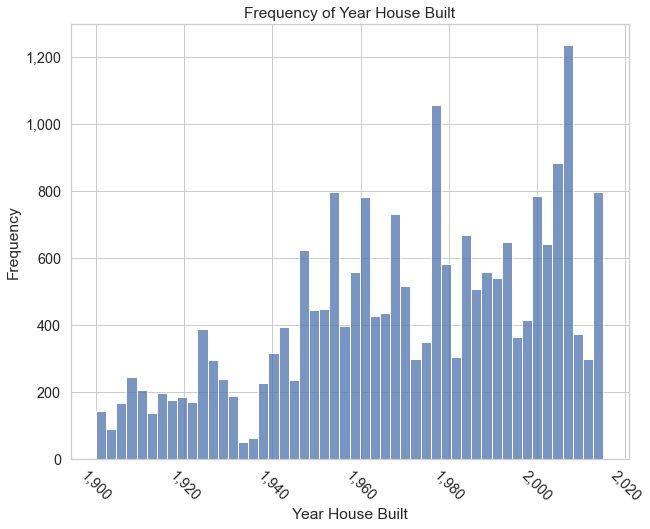

In [49]:
cm.PlotHist(df, 'yr_built', 50)

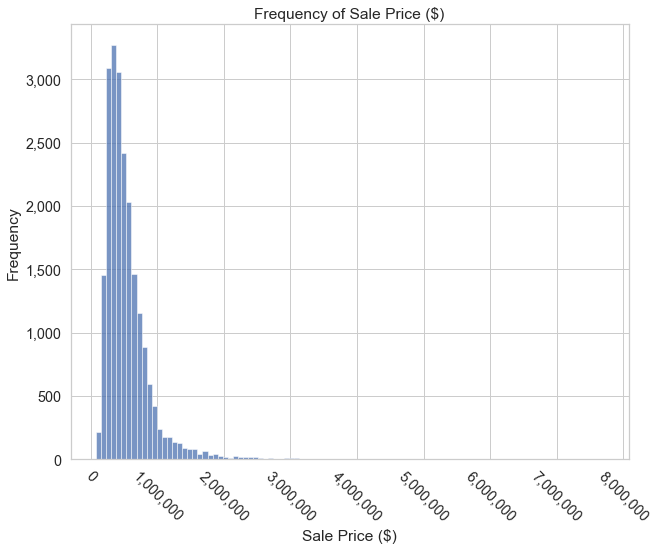

In [51]:
cm.PlotHist(df, 'price', 100)

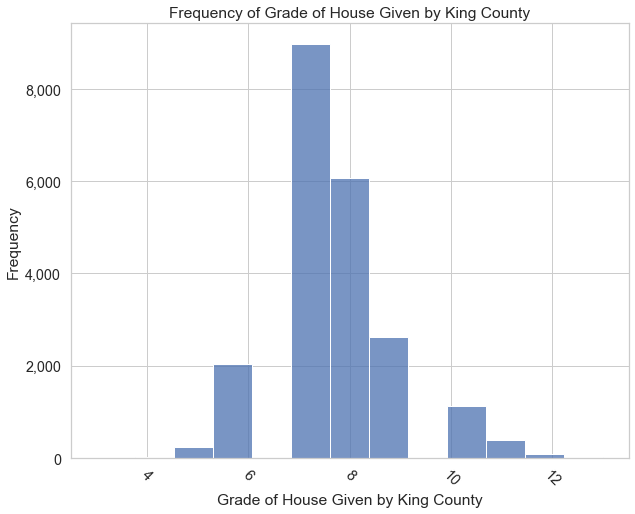

In [54]:
cm.PlotHist(df, 'grade', 13)

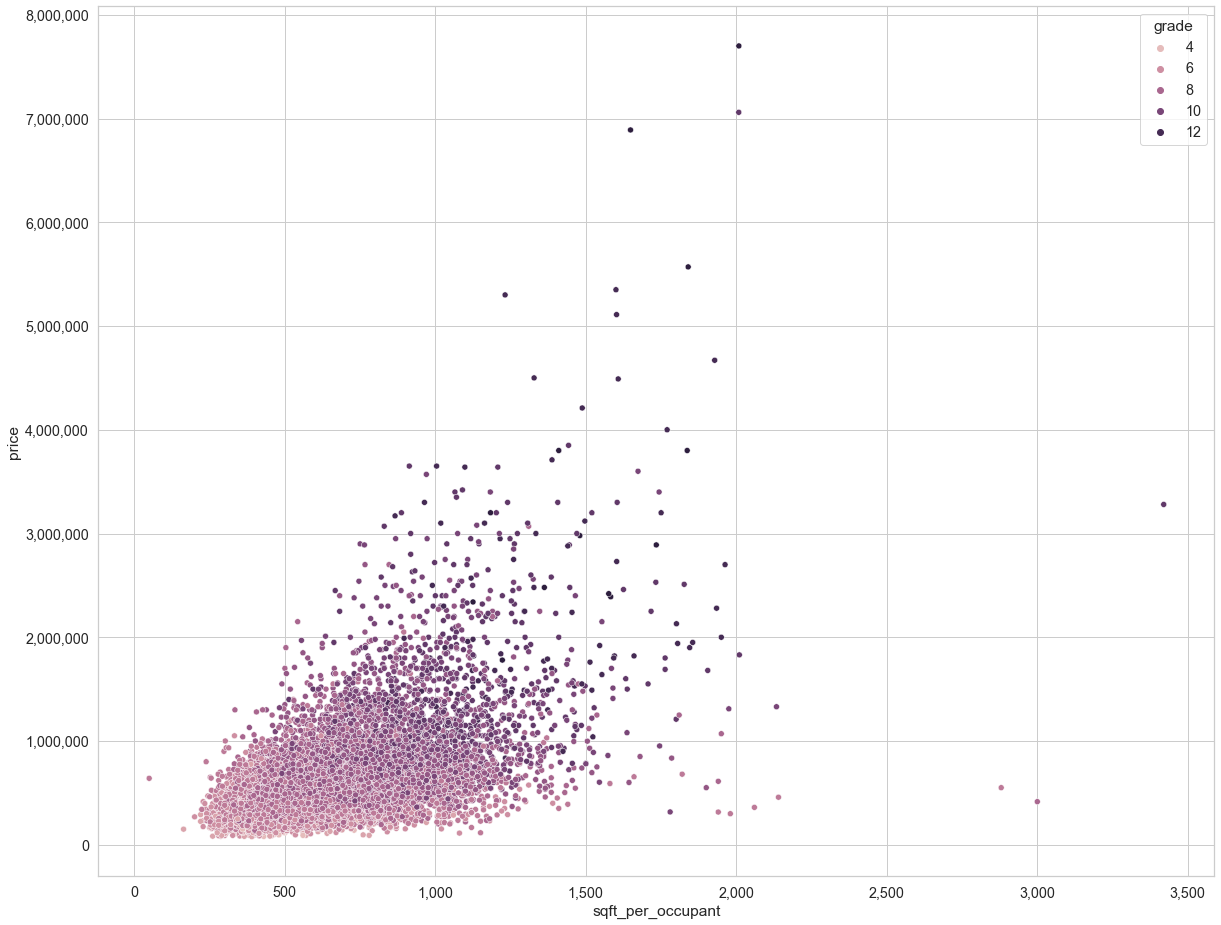

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

xvar = 'sqft_per_occupant'
yvar = 'price'


fig, ax = plt.subplots(figsize=(20,16))
                           
sns.scatterplot(x=xvar,
                y=yvar,
                data=df,
               hue='grade')

    
    
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    

plt.show()

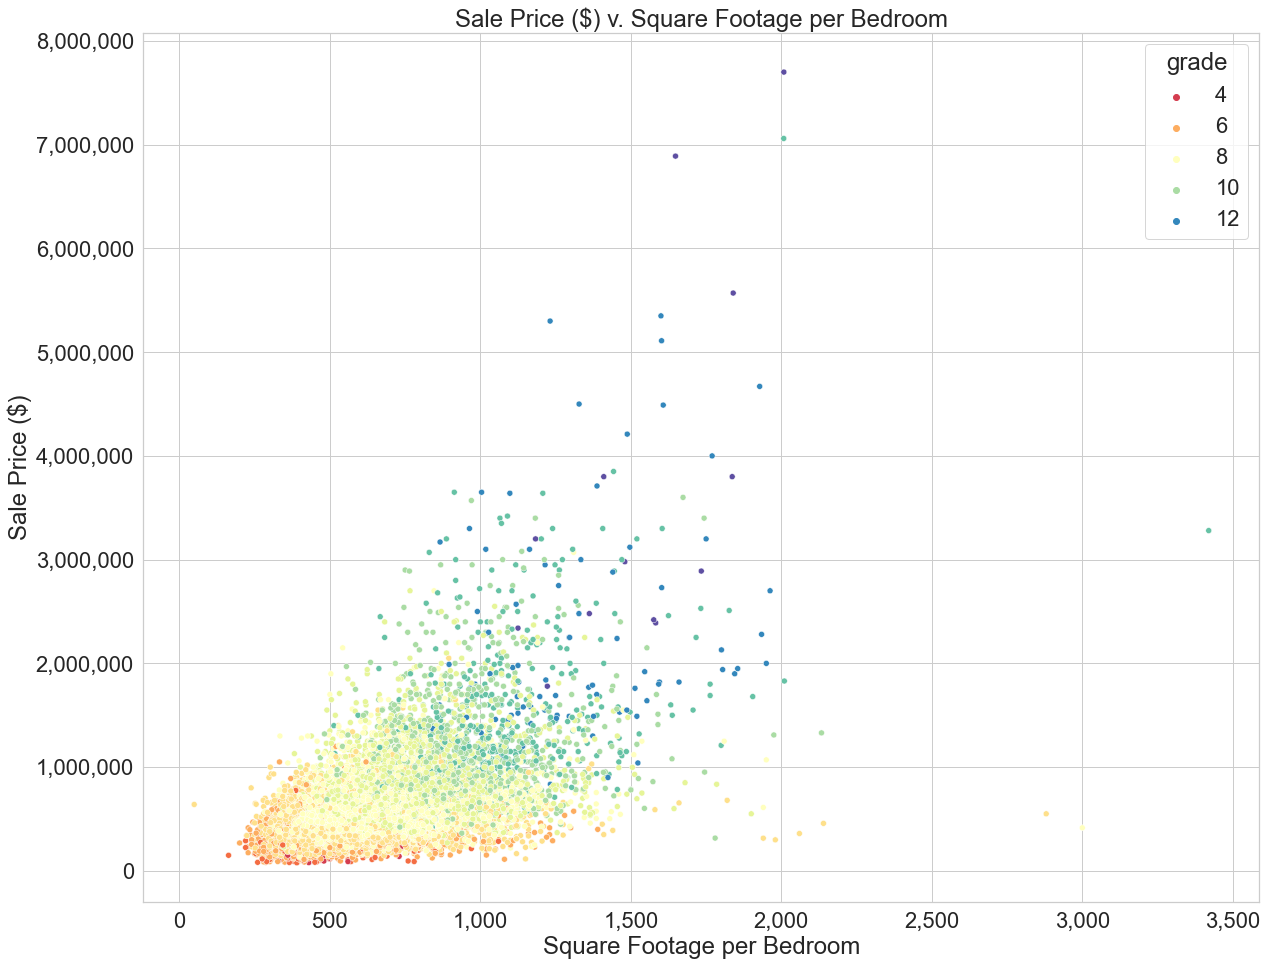

In [81]:
cm.PlotScatter(df, 'sqft_per_occupant', 'price', hue='grade')